# Install Catboost package

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 830.4 kB/s eta 0:00:00


#Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Dataset

In [ ]:
# Load the dataset into a DataFrame
data = pd.read_csv('Thyroid_Diff.csv')

# Display the first few rows of the dataset
data.sample(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
140,28,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
248,52,F,Yes,No,No,Euthyroid,Single nodular goiter-left,Bilateral,Hurthel cell,Multi-Focal,Low,T3a,N0,M0,I,Structural Incomplete,No
98,57,F,Yes,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
68,22,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
39,34,F,No,No,No,Euthyroid,Diffuse goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
# Check data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
# Create a list of column names from the dataset, excluding the first column
cat_cols = list(data.columns[1:])

# Loop through each categorical column
for col in cat_cols:
  print(f'Unique values in {col}: {set(data[col])}')

Unique values in Gender: {'F', 'M'}
Unique values in Smoking: {'No', 'Yes'}
Unique values in Hx Smoking: {'No', 'Yes'}
Unique values in Hx Radiothreapy: {'No', 'Yes'}
Unique values in Thyroid Function: {'Subclinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Euthyroid', 'Subclinical Hypothyroidism', 'Clinical Hyperthyroidism'}
Unique values in Physical Examination: {'Single nodular goiter-right', 'Multinodular goiter', 'Normal', 'Single nodular goiter-left', 'Diffuse goiter'}
Unique values in Adenopathy: {'Extensive', 'Left', 'Right', 'No', 'Bilateral', 'Posterior'}
Unique values in Pathology: {'Follicular', 'Micropapillary', 'Hurthel cell', 'Papillary'}
Unique values in Focality: {'Multi-Focal', 'Uni-Focal'}
Unique values in Risk: {'Intermediate', 'High', 'Low'}
Unique values in T: {'T1a', 'T1b', 'T4a', 'T4b', 'T3a', 'T3b', 'T2'}
Unique values in N: {'N1a', 'N1b', 'N0'}
Unique values in M: {'M1', 'M0'}
Unique values in Stage: {'IVB', 'III', 'I', 'IVA', 'II'}
Unique values in Respon

#EDA

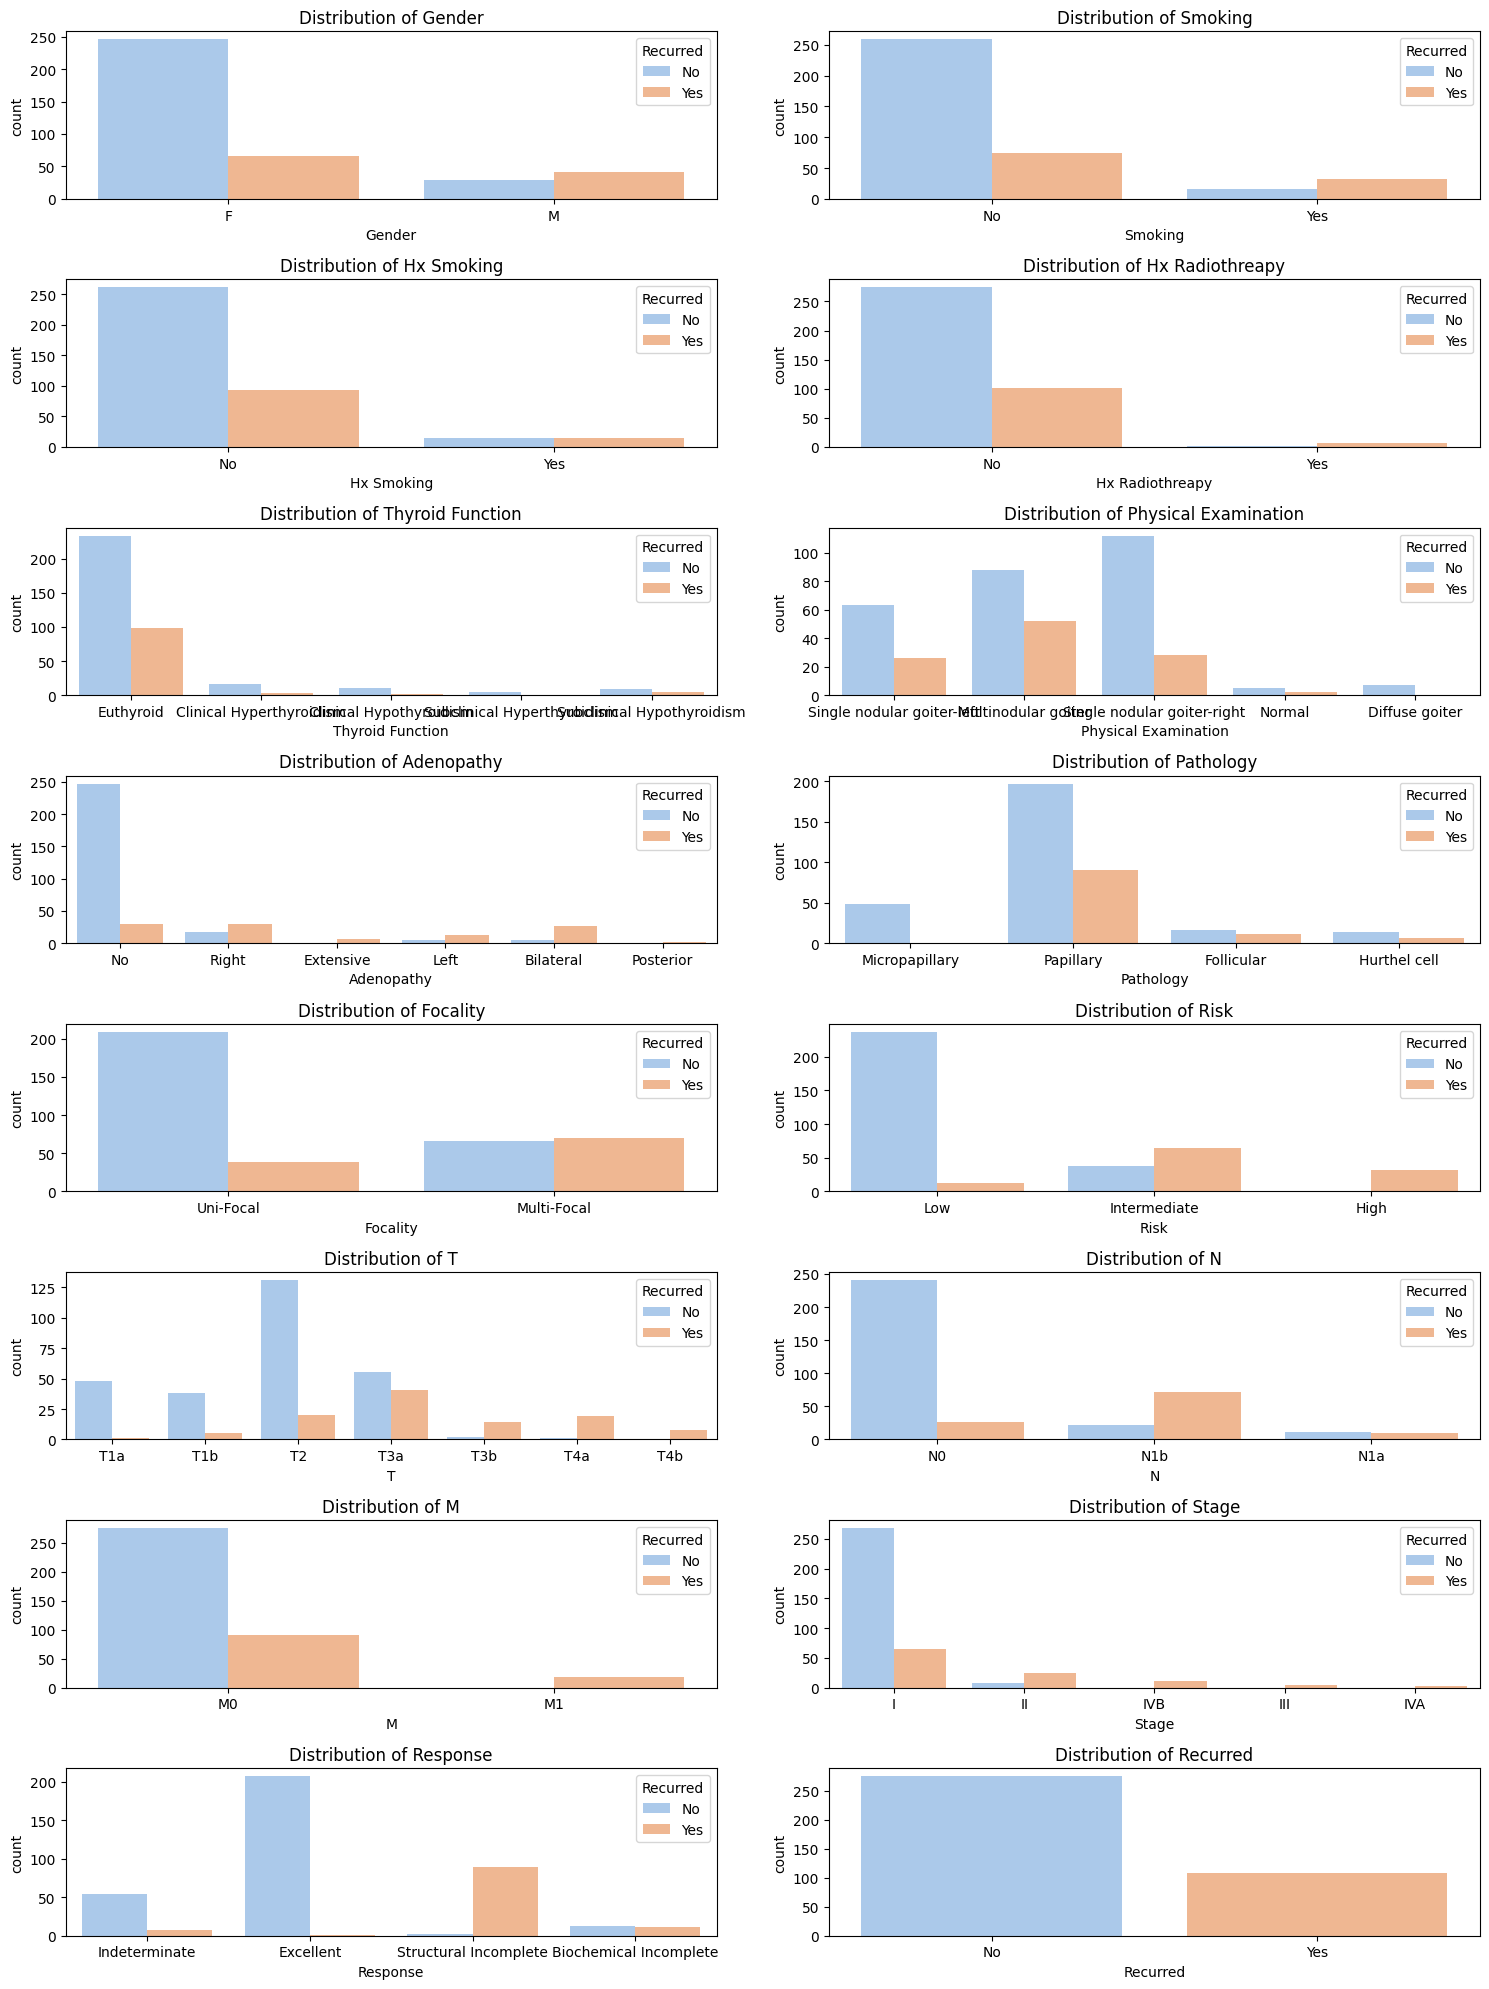

In [ ]:
palette = sns.color_palette("pastel")
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop through each categorical column and create a count plot for each
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue='Recurred', ax=axes[i], palette=palette)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop(['Recurred'], axis=1)
y = data['Recurred']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition and Training phase

In [ ]:
# Define the CatBoost classifier with specific parameter
cat_cols = cat_cols[:-1]
model = CatBoostClassifier(
		 									depth=6,
                      verbose=0,
											n_estimators=100,
											learning_rate=0.1,
											simple_ctr='Counter',
											cat_features=cat_cols,
											combinations_ctr='Counter',
											loss_function='Logloss',
											early_stopping_rounds=10,
											)

# Train the model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

## Evaluate and Trace Training phase

In [ ]:
# Retrieve the evaluation results from the trained CatBoost model
evals_result = model.get_evals_result()

# Extract the training loss (Logloss) values over the training process
train_loss = evals_result['learn']['Logloss']

# Extract the validation loss (Logloss) values over the validation process
test_loss = evals_result['validation']['Logloss']

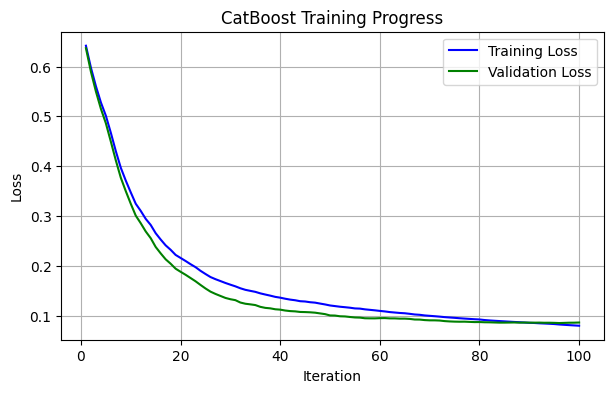

In [ ]:
plt.figure(figsize=(7, 4))

# Generate an array of iteration numbers, ranging from 1 to the total number of training iterations
iterations = np.arange(1, len(train_loss) + 1)

# Plot the training loss values against iterations, with a blue line
plt.plot(iterations, train_loss, label='Training Loss', color='blue')

# Plot the validation loss values against iterations, with a green line
plt.plot(iterations, test_loss, label='Validation Loss', color='green')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

# Prediction phase

In [ ]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Calculate Accuracy and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the Accuracy and F1-score
print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")

Accuracy: 0.987012987012987
F1-Score: 0.986892986892987
